In [1]:
# install all tools and dependencies
import os
import pathlib
import sys

!apt install -y time build-essential
!curl -Ls https://micro.mamba.pm/api/micromamba/linux-64/latest | tar -xvj bin/micromamba
conda_prefix_path = pathlib.Path('conda-env')
CONDA_PREFIX = str(conda_prefix_path.resolve())
%env CONDA_PREFIX={CONDA_PREFIX}
!echo 'python ==3.7*' >> {CONDA_PREFIX}/conda-meta/pinned
site_package_path = conda_prefix_path / 'lib/python3.7/site-packages'
sys.path.append(str(site_package_path.resolve()))
!bin/micromamba create --yes --prefix $CONDA_PREFIX
!bin/micromamba install --yes --prefix $CONDA_PREFIX \
                        --channel litex-hub \
                        --channel main \
                        open_pdks.sky130a \
                        magic \
                        netgen \
                        openroad \
                        yosys \
                        klayout
!bin/micromamba install --yes --prefix $CONDA_PREFIX \
                        --channel conda-forge \
                        svgutils ngspice

!python -m pip install pyyaml click gdstk --no-binary gdstk
PATH = os.environ['PATH']
# clone OpenFASOC repo
!git clone https://github.com/idea-fasoc/OpenFASOC
# setup env
OPENFASOC_ROOT=str(pathlib.Path('OpenFASOC').resolve())
TEMP_SENSE_ROOT=OPENFASOC_ROOT+"/openfasoc/generators/temp-sense-gen/"
!cp OpenFASOC/openfasoc/generators/temp-sense-gen/blocks/sky130hd/gds/HEADER.gds OpenFASOC/docs/source/notebooks/aux_files
!cp OpenFASOC/openfasoc/generators/temp-sense-gen/blocks/sky130hd/gds/SLC.gds OpenFASOC/docs/source/notebooks/aux_files
!cp OpenFASOC/openfasoc/common/platforms/sky130hd/gds/sky130_fd_sc_hd.gds OpenFASOC/docs/source/notebooks/aux_files
!cp OpenFASOC/openfasoc/common/platforms/sky130hd/fill.json OpenFASOC/docs/source/notebooks/aux_files

%env PDK_ROOT={CONDA_PREFIX}/share/pdk
%env OPENFASOC_ROOT={OPENFASOC_ROOT}
PATH = os.environ['PATH']
%env PATH={PATH}:{CONDA_PREFIX}/bin:{OPENFASOC_ROOT}:{OPENFASOC_ROOT}/openfasoc/generators/temp-sense-gen/tools
LD_LIBRARY_PATH = os.environ.get('LD_LIBRARY_PATH', '')
%env LD_LIBRARY_PATH={LD_LIBRARY_PATH}:{CONDA_PREFIX}/lib/python3.7

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.8ubuntu1.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  time
0 upgraded, 1 newly installed, 0 to remove and 21 not upgraded.
Need to get 26.2 kB of archives.
After this operation, 79.9 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 time amd64 1.7-25.1build1 [26.2 kB]
Fetched 26.2 kB in 1s (33.1 kB/s)
Selecting previously unselected package time.
(Reading database ... 128126 files and directories currently installed.)
Preparing to unpack .../time_1.7-25.1build1_amd64.deb ...
Unpacking time (1.7-25.1build1) ...
Setting up time (1.7-25.1build1) ...
Processing triggers for man-db (2.9.1-1) ...
bin/micromamba
env: CONDA_PREFIX=/content/conda-env
/bin/bash: /co

In [2]:
!cd OpenFASOC/openfasoc/generators/temp-sense-gen && make sky130hd_temp_verilog

python3 tools/temp-sense-gen.py --specfile test.json --outputDir ./work --platform sky130hd --mode verilog
#----------------------------------------------------------------------
# Parsing command line arguments...
#----------------------------------------------------------------------
['tools/temp-sense-gen.py', '--specfile', 'test.json', '--outputDir', './work', '--platform', 'sky130hd', '--mode', 'verilog']
Loading specfile...
Searching for the new Temperature Min.... -20
Searching for the new Temperature Max.... 100
*********Performing Error Optimization*********
   Temp  ...  header
0   -20  ...       3
1     0  ...       3
2    20  ...       3
3    40  ...       3
4    60  ...       3
5    80  ...       3
6   100  ...       3

[7 rows x 6 columns]
----calculate_max_error------ 0.794666934962595 0
    Temp  ...  header
7    -20  ...       3
8      0  ...       3
9     20  ...       3
10    40  ...       3
11    60  ...       3
12    80  ...       3
13   100  ...       3

[7 rows x

In [3]:
!cd OpenFASOC/openfasoc/generators/temp-sense-gen/flow && make synth

[INFO][FLOW] Using platform directory /content/OpenFASOC/openfasoc/generators/temp-sense-gen/flow/../../../common/platforms/sky130hd
/content/OpenFASOC/openfasoc/generators/temp-sense-gen/flow/util/markDontUse.py -p "sky130_fd_sc_hd__probe_p_8 sky130_fd_sc_hd__probec_p_8 sky130_fd_sc_hd__lpflow_bleeder_1 sky130_fd_sc_hd__lpflow_clkbufkapwr_1 sky130_fd_sc_hd__lpflow_clkbufkapwr_16 sky130_fd_sc_hd__lpflow_clkbufkapwr_2 sky130_fd_sc_hd__lpflow_clkbufkapwr_4 sky130_fd_sc_hd__lpflow_clkbufkapwr_8 sky130_fd_sc_hd__lpflow_clkinvkapwr_1 sky130_fd_sc_hd__lpflow_clkinvkapwr_16 sky130_fd_sc_hd__lpflow_clkinvkapwr_2 sky130_fd_sc_hd__lpflow_clkinvkapwr_4 sky130_fd_sc_hd__lpflow_clkinvkapwr_8 sky130_fd_sc_hd__lpflow_decapkapwr_12 sky130_fd_sc_hd__lpflow_decapkapwr_3 sky130_fd_sc_hd__lpflow_decapkapwr_4 sky130_fd_sc_hd__lpflow_decapkapwr_6 sky130_fd_sc_hd__lpflow_decapkapwr_8 sky130_fd_sc_hd__lpflow_inputiso0n_1 sky130_fd_sc_hd__lpflow_inputiso0p_1 sky130_fd_sc_hd__lpflow_inputiso1n_1 sky130_fd_sc_hd

In [4]:
!cd OpenFASOC/openfasoc/generators/temp-sense-gen/flow && make floorplan

[INFO][FLOW] Using platform directory /content/OpenFASOC/openfasoc/generators/temp-sense-gen/flow/../../../common/platforms/sky130hd
(/usr/bin/time -f 'Elapsed time: %E[h:]min:sec. CPU time: user %U sys %S (%P). Peak memory: %MKB.' /content/conda-env/bin/openroad -exit -no_init  /content/OpenFASOC/openfasoc/generators/temp-sense-gen/flow/scripts/floorplan.tcl -metrics /content/OpenFASOC/openfasoc/generators/temp-sense-gen/flow/logs/sky130hd/tempsense//2_1_floorplan.json) 2>&1 | tee /content/OpenFASOC/openfasoc/generators/temp-sense-gen/flow/logs/sky130hd/tempsense//2_1_floorplan.log
OpenROAD ed167734d8eab758a1846bf31ca7abc7c6b485fb 
This program is licensed under the BSD-3 license. See the LICENSE file for details.
Components of this program may be licensed under more restrictive licenses which must be honored.
[INFO ODB-0222] Reading LEF file: /content/OpenFASOC/openfasoc/generators/temp-sense-gen/flow/../../../common/platforms/sky130hd/lef/sky130_fd_sc_hd.tlef
[INFO ODB-0223]     Cre

OpenROAD ed167734d8eab758a1846bf31ca7abc7c6b485fb 
This program is licensed under the BSD-3 license. See the LICENSE file for details.
Components of this program may be licensed under more restrictive licenses which must be honored.
[INFO] Clearing cells...
[INFO] Merging GDS files...
	HEADER.gds
	SLC.gds
	sky130_fd_sc_hd.gds
[INFO] Copying toplevel cell 'tempsenseInst_error'
INFO: Reading config file: fill.json
[INFO] Checking for missing GDS...
[INFO] All LEF cells have matching GDS cells
[INFO] Writing out GDS 'out2.gds'


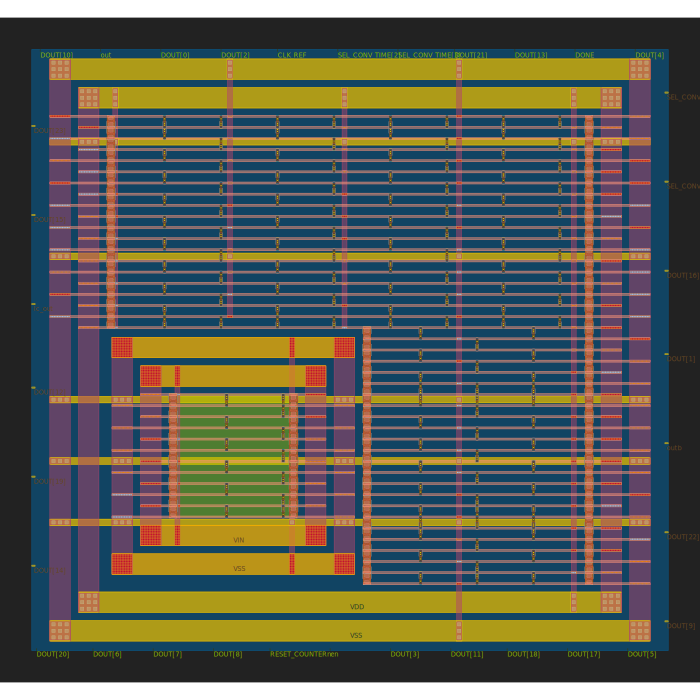

In [5]:
import gdstk
import os
import IPython.display
import svgutils.transform as sg
# work dir setup
!cp OpenFASOC/openfasoc/generators/temp-sense-gen/flow/results/sky130hd/tempsense/2_floorplan.odb OpenFASOC/docs/source/notebooks/aux_files
os.environ['from_oprd_'] = '2_floorplan.odb'
os.environ['to_oprd_'] = 'out2.def'
# convert odb to def
!cd OpenFASOC/docs/source/notebooks/aux_files && openroad -no_init -exit dbtodef.tcl
# convert def to gds
!cd OpenFASOC/docs/source/notebooks/aux_files && klayout -zz -rd design_name=tempsenseInst_error \
            -rd in_def="out2.def" \
            -rd in_gds="HEADER.gds SLC.gds sky130_fd_sc_hd.gds"\
            -rd config_file="fill.json" \
            -rd out_gds="out2.gds" \
            -rd tech_file="klayout.lyt" \
            -rm def2gds.py
!cp OpenFASOC/docs/source/notebooks/aux_files/out2.gds /content
flrpln = gdstk.read_gds("out2.gds".format(TEMP_SENSE_ROOT))
flrpln_top_cell = flrpln.top_level()
flrpln_top_cell[0].write_svg('out2.svg')
fig = sg.fromfile('out2.svg')
fig.set_size(('700','700'))
fig.save('out2.svg')
IPython.display.SVG('out2.svg')

In [6]:
!cd OpenFASOC/openfasoc/generators/temp-sense-gen/flow && make place

[INFO][FLOW] Using platform directory /content/OpenFASOC/openfasoc/generators/temp-sense-gen/flow/../../../common/platforms/sky130hd
(/usr/bin/time -f 'Elapsed time: %E[h:]min:sec. CPU time: user %U sys %S (%P). Peak memory: %MKB.' /content/conda-env/bin/openroad -exit -no_init  /content/OpenFASOC/openfasoc/generators/temp-sense-gen/flow/scripts/global_place_skip_io.tcl -metrics /content/OpenFASOC/openfasoc/generators/temp-sense-gen/flow/logs/sky130hd/tempsense//3_1_place_gp_skip_io.json) 2>&1 | tee /content/OpenFASOC/openfasoc/generators/temp-sense-gen/flow/logs/sky130hd/tempsense//3_1_place_gp_skip_io.log
OpenROAD ed167734d8eab758a1846bf31ca7abc7c6b485fb 
This program is licensed under the BSD-3 license. See the LICENSE file for details.
Components of this program may be licensed under more restrictive licenses which must be honored.
Has top down IO Constraints. Skip global placement without IOs
Elapsed time: 0:00.55[h:]min:sec. CPU time: user 0.47 sys 0.07 (99%). Peak memory: 79444K

OpenROAD ed167734d8eab758a1846bf31ca7abc7c6b485fb 
This program is licensed under the BSD-3 license. See the LICENSE file for details.
Components of this program may be licensed under more restrictive licenses which must be honored.
[INFO] Clearing cells...
[INFO] Merging GDS files...
	HEADER.gds
	SLC.gds
	sky130_fd_sc_hd.gds
[INFO] Copying toplevel cell 'tempsenseInst_error'
INFO: Reading config file: fill.json
[INFO] Checking for missing GDS...
[INFO] All LEF cells have matching GDS cells
[INFO] Writing out GDS 'out3.gds'


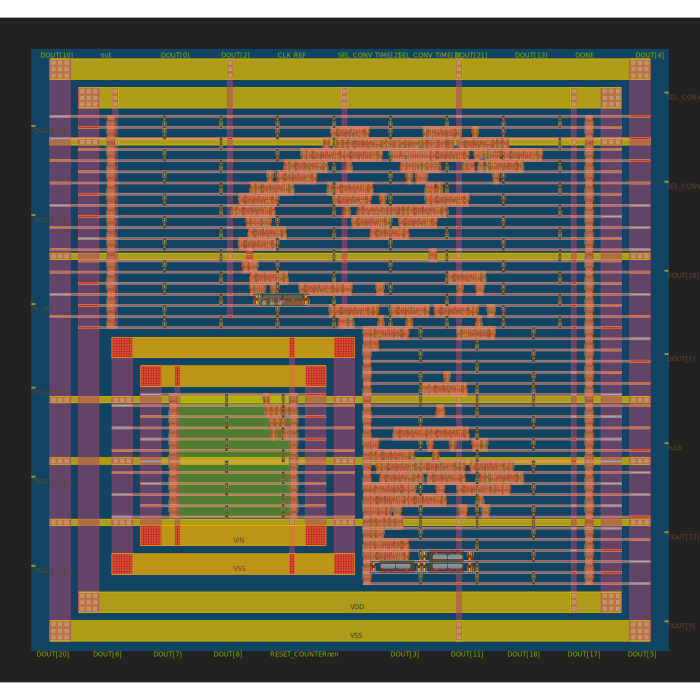

In [7]:
import gdstk
import IPython.display
import svgutils.transform as sg
# work dir setup
!cp OpenFASOC/openfasoc/generators/temp-sense-gen/flow/results/sky130hd/tempsense/3_place.odb OpenFASOC/docs/source/notebooks/aux_files
os.environ['from_oprd_'] = '3_place.odb'
os.environ['to_oprd_'] = 'out3.def'
# convert odb to def
!cd OpenFASOC/docs/source/notebooks/aux_files && openroad -no_init -exit dbtodef.tcl
# convert def to gds
!cd OpenFASOC/docs/source/notebooks/aux_files && klayout -zz -rd design_name=tempsenseInst_error \
            -rd in_def="out3.def" \
            -rd in_gds="HEADER.gds SLC.gds sky130_fd_sc_hd.gds" \
            -rd config_file="fill.json" \
            -rd out_gds="out3.gds" \
            -rd tech_file="klayout.lyt" \
            -rm def2gds.py
!cp OpenFASOC/docs/source/notebooks/aux_files/out3.gds /content
flrpln = gdstk.read_gds("out3.gds".format(TEMP_SENSE_ROOT))
flrpln_top_cell = flrpln.top_level()
flrpln_top_cell[0].write_svg('out3.svg')
fig = sg.fromfile('out3.svg')
fig.set_size(('700','700'))
fig.save('out3.svg')
IPython.display.SVG('out3.svg')

In [8]:
!cd OpenFASOC/openfasoc/generators/temp-sense-gen/flow && make finish

[INFO][FLOW] Using platform directory /content/OpenFASOC/openfasoc/generators/temp-sense-gen/flow/../../../common/platforms/sky130hd
cp /content/OpenFASOC/openfasoc/generators/temp-sense-gen/flow/results/sky130hd/tempsense//3_place.odb /content/OpenFASOC/openfasoc/generators/temp-sense-gen/flow/results/sky130hd/tempsense//4_1_cts.odb
(/usr/bin/time -f 'Elapsed time: %E[h:]min:sec. CPU time: user %U sys %S (%P). Peak memory: %MKB.' /content/conda-env/bin/openroad -exit -no_init  /content/OpenFASOC/openfasoc/generators/temp-sense-gen/flow/scripts/fillcell.tcl -metrics /content/OpenFASOC/openfasoc/generators/temp-sense-gen/flow/logs/sky130hd/tempsense//4_2_cts_fillcell.json) 2>&1 | tee /content/OpenFASOC/openfasoc/generators/temp-sense-gen/flow/logs/sky130hd/tempsense//4_2_cts_fillcell.log
OpenROAD ed167734d8eab758a1846bf31ca7abc7c6b485fb 
This program is licensed under the BSD-3 license. See the LICENSE file for details.
Components of this program may be licensed under more restrictive l

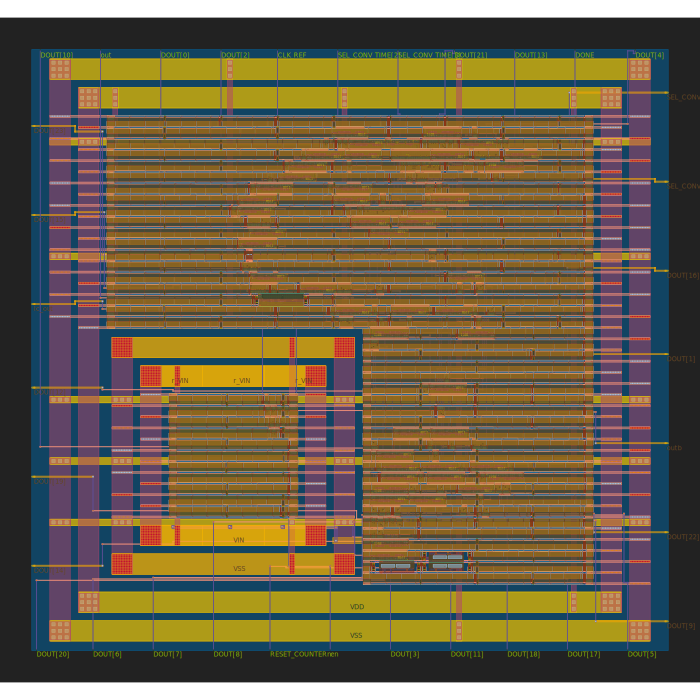

In [9]:
import gdstk
import IPython.display
import svgutils.transform as sg
!cp OpenFASOC/openfasoc/generators/temp-sense-gen/flow/results/sky130hd/tempsense/6_final.gds /content
flrpln = gdstk.read_gds("6_final.gds".format(TEMP_SENSE_ROOT))
flrpln_top_cell = flrpln.top_level()
flrpln_top_cell[0].write_svg('6_final.svg')
fig = sg.fromfile('6_final.svg')
fig.set_size(('700','700'))
fig.save('6_final.svg')
IPython.display.SVG('6_final.svg')

In [10]:
!cd OpenFASOC/openfasoc/generators/temp-sense-gen/flow && make magic_drc
!cd OpenFASOC/openfasoc/generators/temp-sense-gen/flow && make netgen_lvs

[INFO][FLOW] Using platform directory /content/OpenFASOC/openfasoc/generators/temp-sense-gen/flow/../../../common/platforms/sky130hd
/content/OpenFASOC/openfasoc/generators/temp-sense-gen/flow/../../../common/drc-lvs-check/run_drc.sh

Magic 8.3 revision 367 - Compiled on Sat Feb 18 07:31:06 UTC 2023.
Starting magic under Tcl interpreter
Using the terminal as the console.
Using NULL graphics device.
Processing system .magicrc file
Sourcing design .magicrc for technology sky130A ...
2 Magic internal units = 1 Lambda
Input style sky130(): scaleFactor=2, multiplier=2
The following types are not handled by extraction and will be treated as non-electrical types:
    ubm 
Scaled tech values by 2 / 1 to match internal grid scaling
Loading sky130A Device Generator Menu ...
Loading "/content/OpenFASOC/openfasoc/generators/temp-sense-gen/flow/../../../common/drc-lvs-check/magic_commands.tcl" from command line.
Library written using GDS-II Release 6.0
Library name: LIB
Reading "sky130_fd_sc_hd__ta

In [11]:
%cd /content/OpenFASOC/openfasoc/generators/temp-sense-gen
!mkdir -p work
%cd tools
from simulation import generate_runs
import shutil
import json
import os
shutil.copyfile(
    "/content/OpenFASOC/openfasoc/generators/temp-sense-gen/flow/results/sky130hd/tempsense/6_final.gds",
    "/content/OpenFASOC/openfasoc/generators/temp-sense-gen/work/tempsenseInst_error.gds",
)
shutil.copyfile(
    "/content/OpenFASOC/openfasoc/generators/temp-sense-gen/flow/results/sky130hd/tempsense/6_final.def",
    "/content/OpenFASOC/openfasoc/generators/temp-sense-gen/work/tempsenseInst_error.def",
)
shutil.copyfile(
    "/content/OpenFASOC/openfasoc/generators/temp-sense-gen/flow/objects/sky130hd/tempsense/netgen_lvs/spice/tempsenseInst_error.spice",
    "/content/OpenFASOC/openfasoc/generators/temp-sense-gen/work/tempsenseInst_error.spice",
)
shutil.copyfile(
    "/content/OpenFASOC/openfasoc/generators/temp-sense-gen/flow/objects/sky130hd/tempsense/netgen_lvs/spice/tempsenseInst_error_pex.spice",
    "/content/OpenFASOC/openfasoc/generators/temp-sense-gen/work/tempsenseInst_error_pex.spice",
)
%cd ..
stage_var = [int(6) - 1]
header_var = [int(3)]
# make a temp list
temp_start = -20
temp_stop = 100
temp_step = 20
temp_points = int((temp_stop - temp_start) / temp_step)
temp_list = []
for i in range(0, temp_points + 1):
    temp_list.append(temp_start + i * temp_step)
with open("/content/OpenFASOC/openfasoc/common/platform_config.json") as file:
    jsonConfig = json.load(file)
pdkrt = os.environ.get('PDK_ROOT')
prepexDir = generate_runs(
    "/content/OpenFASOC/openfasoc/generators/temp-sense-gen/",
    "tempsenseInst_error",
    header_var,
    stage_var,
    temp_list,
    jsonConfig,
    "sky130hd",
    "sim",
    pdkrt+"/sky130A/",
    spiceDir="work",
    prePEX=True,
)
%cd /content

/content/OpenFASOC/openfasoc/generators/temp-sense-gen
/content/OpenFASOC/openfasoc/generators/temp-sense-gen/tools
/content/OpenFASOC/openfasoc/generators/temp-sense-gen
spice netlists created for different temperatures to run the prePEX simulations
/content


/content/OpenFASOC/openfasoc/generators/temp-sense-gen
#----------------------------------------------------------------------
# Parsing command line arguments...
#----------------------------------------------------------------------
['tools/readparamgen.py', '--specfile', 'test.json', '--outputDir', './work', '--platform', 'sky130hd', '--mode', 'macro']
Loading specfile...
Searching for the new Temperature Min.... -20
Searching for the new Temperature Max.... 100
---check_search_done---- FILE IS PRESENT LETS CHECK IF SEARCH WAS ALREADY DONE
---check_search_done---- search_param :    Tempmin:-20,Tempmax:100,Optimization:error,Model:tools/..//models/modelfile.csv,Delta_1st_pass:10
---check_search_done---- df_search_done :       Temp  ...                                       search_param
0    20  ...  Tempmin:-20,Tempmax:100,Optimization:error,Mod...

[1 rows x 6 columns]
File present : SEARCH already done
---check_search_done---- get old research results :    20 2.44027697469062e-07 -

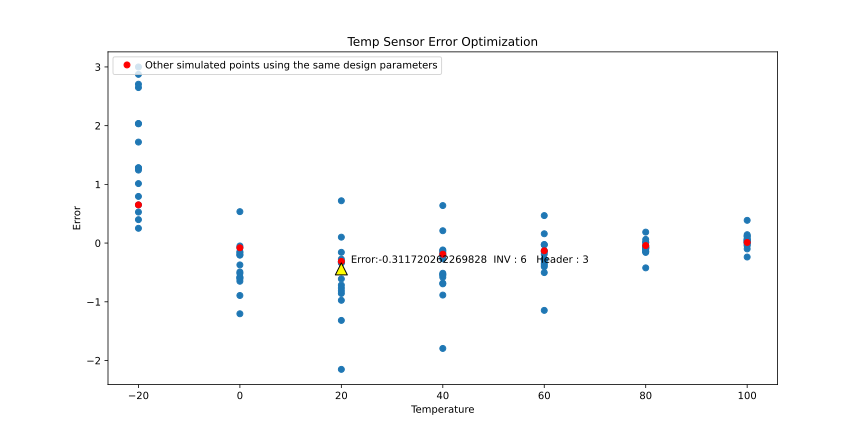

In [12]:
%cd /content/OpenFASOC/openfasoc/generators/temp-sense-gen
with open("tools/readparamgen.py","r") as pltr:
  pltr_str=pltr.read()
  pltr_str=pltr_str.replace("myplot.", "myplt.")
  pltr_str=pltr_str+"\nplot()\n"
with open("tools/readparamgen.py","w") as pltr:
  pltr.write(pltr_str)
!python3 tools/readparamgen.py --specfile test.json --outputDir ./work --platform sky130hd --mode macro
IPython.display.SVG('run_stats.svg')